In [1]:
import numpy as np
np.random.seed(123)

# Gathering Data

In [2]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


In [3]:
print("Train Images: {}".format(train_images.shape))
print("Train Labels: {}".format(train_labels.shape))

print("Test Images: {}".format(test_images.shape))
print("Test Labels: {}".format(test_labels.shape))

Train Images: (60000, 28, 28)
Train Labels: (60000,)
Test Images: (10000, 28, 28)
Test Labels: (10000,)


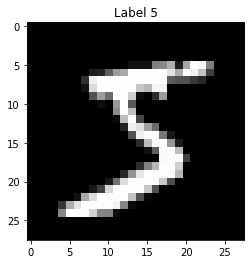

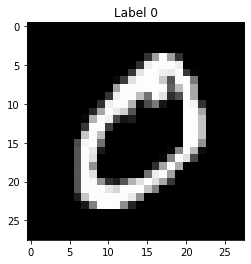

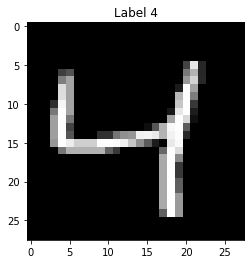

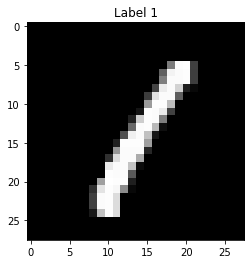

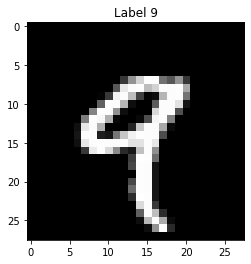

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

for (image, label) in zip(train_images[:5], train_labels[:5]):
    plt.title("Label {}".format(label))
    plt.imshow(image, cmap='gray')
    plt.show()

# Manipulate & Normalize Data

In [5]:
train_images = train_images.reshape(train_images.shape[0], 28 * 28)
train_images = train_images / 255.

test_images = test_images.reshape(test_images.shape[0],  28 * 28)
test_images = test_images / 255.

In [6]:
print(train_labels[:5])

[5 0 4 1 9]


In [7]:
from keras import utils

train_labels = utils.to_categorical(train_labels)
test_labels = utils.to_categorical(test_labels)

In [8]:
print(train_labels[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


# Build Model

In [9]:
from keras import models
from keras import layers

In [10]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_dim=28*28))
model.add(layers.Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='Adam',
                            loss='categorical_crossentropy',
                            metrics=['acc'] )

# Training the Model

In [13]:
model.fit(train_images, train_labels, 
                validation_split=.25, 
                batch_size=128, 
                epochs=10)

Instructions for updating:
Use tf.cast instead.
Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 8s 171us/step - loss: 0.3033 - acc: 0.9141 - val_loss: 0.1648 - val_acc: 0.9533
Epoch 2/10
45000/45000 [==============================] - 6s 141us/step - loss: 0.1255 - acc: 0.9641 - val_loss: 0.1241 - val_acc: 0.9630
Epoch 3/10
45000/45000 [==============================] - 5s 122us/step - loss: 0.0811 - acc: 0.9770 - val_loss: 0.1020 - val_acc: 0.9690
Epoch 4/10
45000/45000 [==============================] - 5s 114us/step - loss: 0.0581 - acc: 0.9829 - val_loss: 0.0942 - val_acc: 0.9718
Epoch 5/10
45000/45000 [==============================] - 4s 98us/step - loss: 0.0422 - acc: 0.9883 - val_loss: 0.0795 - val_acc: 0.9766
Epoch 6/10
45000/45000 [==============================] - 4s 88us/step - loss: 0.0314 - acc: 0.9916 - val_loss: 0.0773 - val_acc: 0.9773
Epoch 7/10
45000/45000 [==============================] - 4s 94us/step - los

# Evaluation

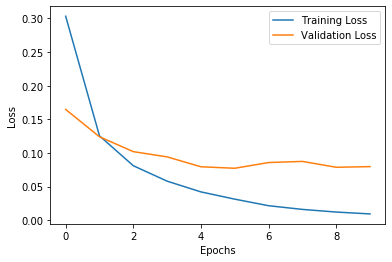

In [14]:
model_history = model.history.history
plt.plot(model_history['loss'], label="Training Loss")
plt.plot(model_history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

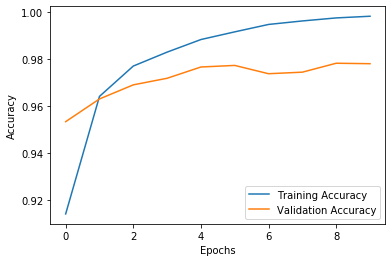

In [15]:
plt.plot(model_history['acc'], label="Training Accuracy")
plt.plot(model_history['val_acc'], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Training Final Model

In [16]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_dim=28*28))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='Adam',
                            loss='categorical_crossentropy',
                            metrics=['acc'] )
history = model.fit(train_images, train_labels, batch_size=128, epochs=4)

Epoch 1/4
60000/60000 [==============================] - 6s 102us/step - loss: 0.2758 - acc: 0.9216
Epoch 2/4
60000/60000 [==============================] - 6s 99us/step - loss: 0.1139 - acc: 0.9670
Epoch 3/4
60000/60000 [==============================] - 5s 75us/step - loss: 0.0729 - acc: 0.9792
Epoch 4/4
60000/60000 [==============================] - 4s 74us/step - loss: 0.0527 - acc: 0.9843


# Final Results

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test Loss: {} | Test Acc: {}".format(test_loss, test_acc))

10000/10000 [==============================] - 1s 71us/step
Test Loss: 0.0749703453049995 | Test Acc: 0.977


In [18]:
from ipywidgets import interact

def show(idx=0):
    test_image = np.expand_dims(test_images[idx], axis=0)
    predict_label = model.predict_classes(test_image)
    plt.title("Prediction: {}".format(predict_label))
    plt.imshow(test_image.reshape(28, 28), cmap='gray')

interact(show, idx=(0, len(test_images)-1, 1))

interactive(children=(IntSlider(value=0, description='idx', max=9999), Output()), _dom_classes=('widget-intera…

<function __main__.show(idx=0)>